# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df = pd.read_csv("/content/car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
# To find the no.of rows and columns
df.shape

(804, 12)

In [ ]:
#info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [ ]:
# Finding the null values in dataset
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

# **Tasks, Part 1**

1. Find the linear regression equation for mileage vs price.

2. Chart the original data and the equation on the chart.

3. Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

# **1. Find the linear regression equation for mileage vs price.**

In [ ]:
#load dataset
x=df["Mileage"]
y=df["Price"]

In [ ]:
#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
#reshape the data to fit the model
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [ ]:
# Fit the model
mlr=LinearRegression()

In [ ]:
mlr.fit(x_train, y_train)
train_pred=mlr.predict(x_train)
from sklearn import metrics
error_score=metrics.r2_score(y_train,train_pred)
#print(error_score)
coe=mlr.coef_
inter=mlr.intercept_
#print(coe,inter)
Y=(train_pred*coe)+inter
#print(Y)
error_score=metrics.r2_score(train_pred,Y)
#print(error_score)
mlr.fit(x_test,y_test)
test_pred= mlr.predict(x_test)
coe_test=mlr.coef_
inter_test=mlr.intercept_
Y_test=(test_pred*coe_test)+inter_test
Y_test[1:10]                        

array([[20593.46051025],
       [20218.71888951],
       [20526.25922288],
       [20649.51479074],
       [20674.36277269],
       [20565.15402974],
       [20659.99670176],
       [20612.32262932],
       [20585.5325674 ]])

In [ ]:
print("The equation of linear regresssion is : \t",*mlr.coef_,' x +',mlr.intercept_)

The equation of linear regresssion is : 	 [-0.16310682]  x + [23874.11319752]


# **2. Chart the original data and the equation on the chart.**

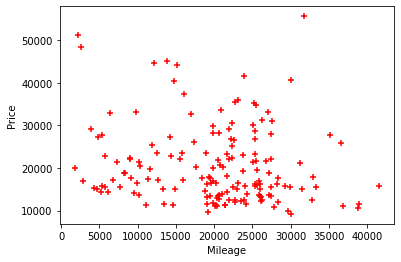

In [ ]:
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.scatter(x_test,y_test,color="red",marker="+")#,figsize=(10,10))
#plt.plot(x_test,Y_test,color="blue")

# **3. Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**


In [ ]:
error_score_test=metrics.r2_score(x_test,Y_test)
print(error_score_test)
print(f'The model score is : \t {error_score_test}')
if error_score_test<0.8:
  print('Equation is not a good fit. (0.8 and greater is considered a strong correlation.)')
else:
  print('Equation is a good fit.')

0.04880945395008118
The model score is : 	 0.04880945395008118
Equation is not a good fit. (0.8 and greater is considered a strong correlation.)


# **Tasks, Part 2**

 1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

2. Find the equation's score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

3. Find the combination of the factors that is the best predictor for price.

# **1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.**

In [ ]:
df.Mileage=df["Mileage"]/1000

In [ ]:
# load the dataset
inde=df.drop(["Make","Model", "Trim", "Type","Price"],axis=1)
dep= df["Price"]

In [ ]:
# split the dataset
i_train, i_test, d_train, d_test = train_test_split(inde, dep, test_size = 0.3, random_state = 3)


In [ ]:
# Model fitting

mlr=LinearRegression()
mlr.fit(i_train,d_train)
pred_train=mlr.predict(i_train)
error_score_train = metrics.r2_score(d_train,pred_train)
mlr.fit(i_test,d_test)
pred_test=mlr.predict(i_test)

In [ ]:
#linear regression equation
coe_test=mlr.coef_
inter_test=mlr.intercept_
Y_test=(i_test*coe_test)+inter_test
Y_test.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
123,3790.778234,39462.308081,-845.457526,-1.920289,12989.359396,3080.813188,9779.453734
648,1625.276368,22649.365192,2931.257160,-1.920289,12989.359396,5836.422302,5836.422302
720,4617.006101,22649.365192,2495.482388,-1.920289,12989.359396,5836.422302,9779.453734
623,4444.672490,22649.365192,3221.773674,-1.920289,5836.422302,5836.422302,5836.422302
612,3242.596122,22649.365192,3221.773674,-1.920289,5836.422302,5836.422302,9779.453734


In [ ]:
print("The linear regression equation is : y={}*x1+{}*x2+{}*x3+{}*x4+{}*x5+{}*x6+{}*x7 + ({})".format(round(coe_test[0],2),round(coe_test[1],2),round(coe_test[2],2),round(coe_test[3],2),round(coe_test[4],2),round(coe_test[5],2),round(coe_test[6],2),inter_test))


The linear regression equation is : y=-152.1*x1+4203.24*x2+-1452.58*x3+-1459.59*x4+7152.94*x5+-2755.61*x6+3943.03*x7 + (5836.422301933537)


# **2. Find the equation's score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [ ]:
error_score_test=metrics.r2_score(d_test,pred_test)
print(error_score_test)
print(f'The model score is : \t {error_score_test}')
if error_score_test<0.8:
  print('Equation is not a good fit. (0.8 and greater is considered a strong correlation.)')
else:
  print('Equation is a good fit.')

0.5083639932121422
The model score is : 	 0.5083639932121422
Equation is not a good fit. (0.8 and greater is considered a strong correlation.)


# **3. Find the combination of the factors that is the best predictor for price.**

In [ ]:
corr = df.corr()["Price"].sort_values(ascending=False)[1:]
# print(corr)
abs_corr = abs(corr)
relevant_features = abs_corr[abs_corr>0.5]
print('The combination of the factors that is the best predictor for price is \n',relevant_features)

The combination of the factors that is the best predictor for price is 
 Cylinder    0.569086
Liter       0.558146
Name: Price, dtype: float64


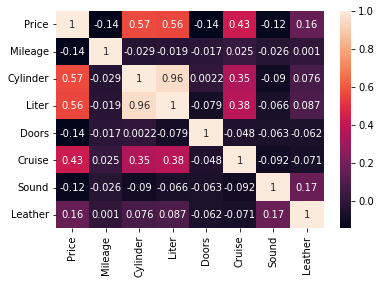

In [ ]:
import seaborn as sns
heat=sns.heatmap(df.corr(),annot=True)
heat

# **Tasks, Hard mode**

# **1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.**


In [ ]:
df=pd.get_dummies(df,columns=["Make","Model","Type"])
df


,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8.221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9.135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13.196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16.342,Sedan 4D,6,3.1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19.832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16.229,L300 Sedan 4D,6,3.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19.095,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20.484,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25.979,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.info

<bound method DataFrame.info of             Price  Mileage           Trim  Cylinder  Liter  Doors  Cruise  \
0    17314.103129    8.221       Sedan 4D         6    3.1      4       1   
1    17542.036083    9.135       Sedan 4D         6    3.1      4       1   
2    16218.847862   13.196       Sedan 4D         6    3.1      4       1   
3    16336.913140   16.342       Sedan 4D         6    3.1      4       1   
4    16339.170324   19.832       Sedan 4D         6    3.1      4       1   
..            ...      ...            ...       ...    ...    ...     ...   
799  16507.070267   16.229  L300 Sedan 4D         6    3.0      4       1   
800  16175.957604   19.095  L300 Sedan 4D         6    3.0      4       1   
801  15731.132897   20.484  L300 Sedan 4D         6    3.0      4       1   
802  15118.893228   25.979  L300 Sedan 4D         6    3.0      4       1   
803  13585.636802   35.662  L300 Sedan 4D         6    3.0      4       1   

     Sound  Leather  Make_Buick  ...  Model

# **2. Find the best combination of factors to predict price.**

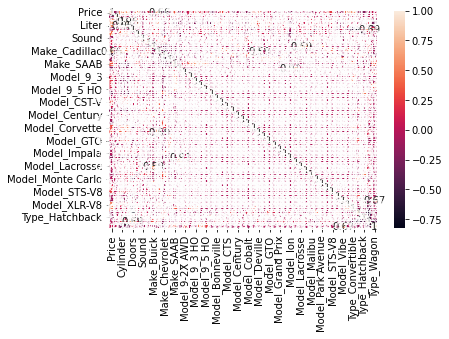

In [ ]:
import seaborn as sns
heat=sns.heatmap(df.corr(),annot=True)
heat

Make_Cadillac_x, Make_Cadillac_y, Type_Convertible_x, Type_Convertible_y, Model_XLR-V8_y,